In [1]:
import sys,os
sys.path.append("/nlp/scr/zyanzhe/Pix2Code")

from Pix2Code.metrics.visual_score import visual_eval_v3
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_images_side_by_side(image_file_lst, border_color='black', border_width=0.05):
    n_images = len(image_file_lst)
    # Read the images
    images = [cv2.imread(image_file) for image_file in image_file_lst]

    # Set up the figure and subplots
    plt.figure(figsize=(40, 10))  # Adjusted the size to accommodate four images

    # Adjust subplot parameters to create space (border) between images
    plt.subplots_adjust(wspace=border_width)

    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')

    # Set the background color of the figure (acts as border color)
    plt.gcf().set_facecolor(border_color)

    # Display the images
    plt.show()

In [3]:
reference_dir = "../../testset_100"
websight_predictions_dir = "../../predictions_100/websight"
direct_prompting_predictions_dir = "../../predictions_100/gpt4v_direct_prompting"
text_augmented_prompting_predictions_dir = "../../predictions_100/gpt4v_text_augmented_prompting"
revision_prompting_predictions_dir = "../../predictions_100/gpt4v_visual_revision_prompting"

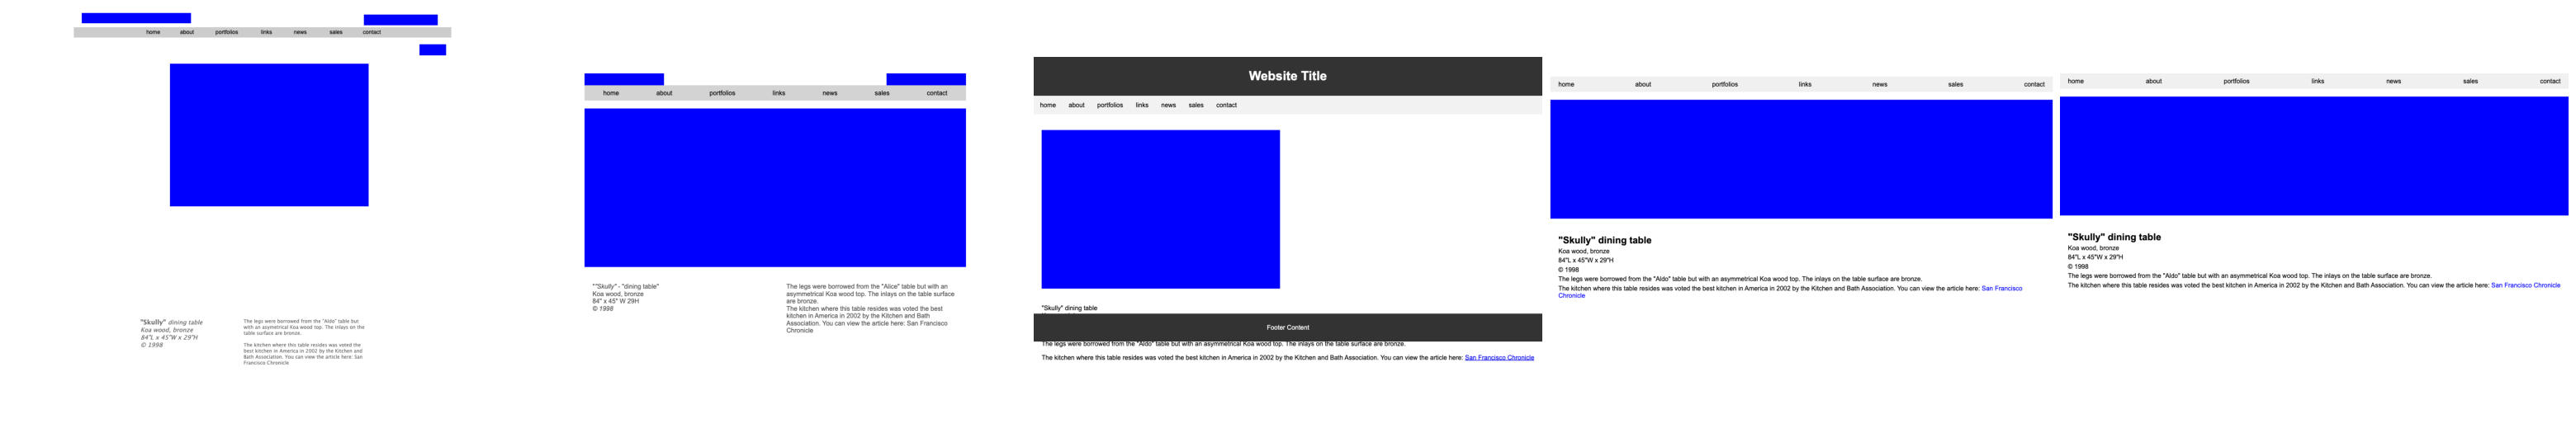

In [4]:
show_images_side_by_side((os.path.join(reference_dir, "2.png"), os.path.join(websight_predictions_dir, "2.png"), os.path.join(direct_prompting_predictions_dir, "2.png"), os.path.join(text_augmented_prompting_predictions_dir, "2.png"), os.path.join(revision_prompting_predictions_dir, "2.png")), border_color='white', border_width=0.01)

16635.html
websight score:  0.7971057422452775

final_size_score 1.0
Matched Text Score 0.9834760060323969
Position Score 0.8834056810319296
Text Color Score 0.9192872804168544
CLIP Score 0.9342538714408875
--------------------------------

direct prompting score:  0.6909733031924269

final_size_score 0.9999357955731047
Matched Text Score 0.9990253411306043
Position Score 0.9430596101582691
Text Color Score 0.7431352253145086
CLIP Score 0.9093641638755798
--------------------------------

text augmented prompting score:  0.7247773324974673

final_size_score 0.968225054084601
Matched Text Score 0.9990253411306043
Position Score 0.9082919688679558
Text Color Score 0.7643016728781694
CLIP Score 0.9248572587966919
--------------------------------

revision prompting score:  0.7117093754928127

final_size_score 0.959873245548461
Matched Text Score 0.9990253411306043
Position Score 0.9373661652067661
Text Color Score 0.7639820385670554
CLIP Score 0.9048567414283752
--------------------------

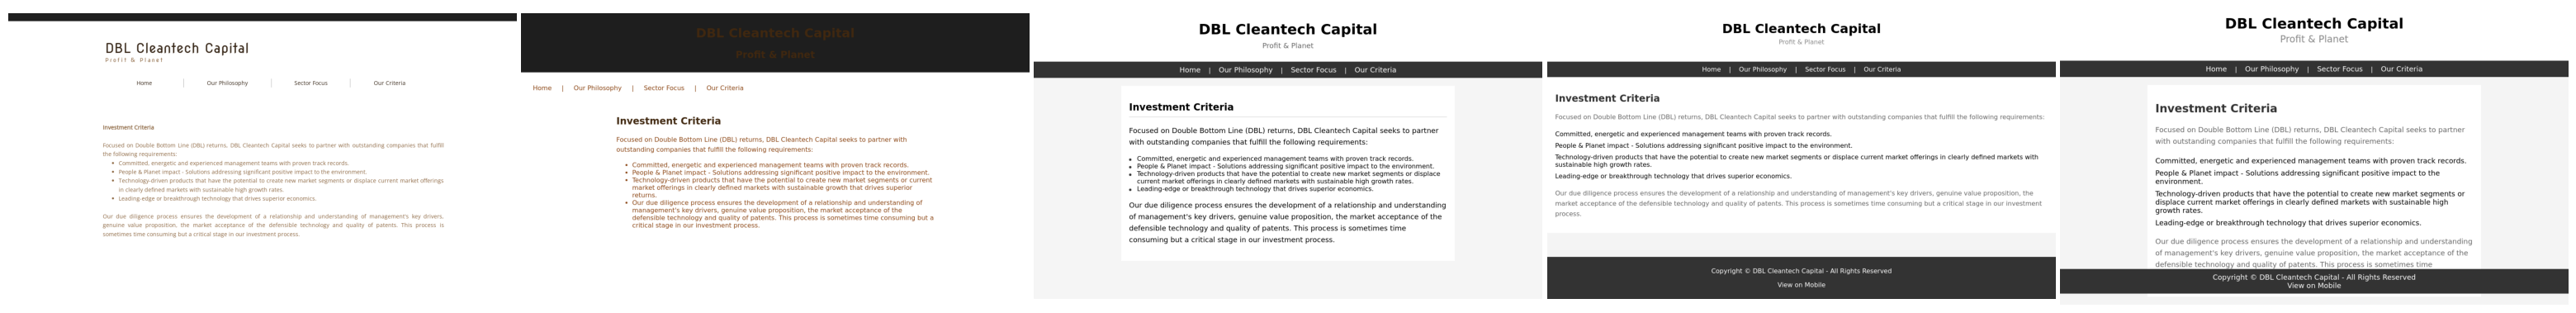

8512.html
websight score:  0.0005715704485846726

final_size_score 0.001806089208672174
Matched Text Score 0.8771428571428571
Position Score 0.5511672012219734
Text Color Score 0.858959315849927
CLIP Score 0.8176040649414062
--------------------------------

direct prompting score:  0.29312922311829787

final_size_score 0.43889283310023125
Matched Text Score 0.9514621053320744
Position Score 0.9099592995462379
Text Color Score 0.9226125987959666
CLIP Score 0.8222635388374329
--------------------------------

text augmented prompting score:  0.5395013563582213

final_size_score 0.8643175125374511
Matched Text Score 0.9883615076526712
Position Score 0.9185630893336484
Text Color Score 0.8562152070928651
CLIP Score 0.8925321698188782
--------------------------------

revision prompting score:  0.53259575593013

final_size_score 0.8601847927645373
Matched Text Score 0.9832353979180101
Position Score 0.7818094282753784
Text Color Score 0.8282578483984707
CLIP Score 0.912458598613739
-------

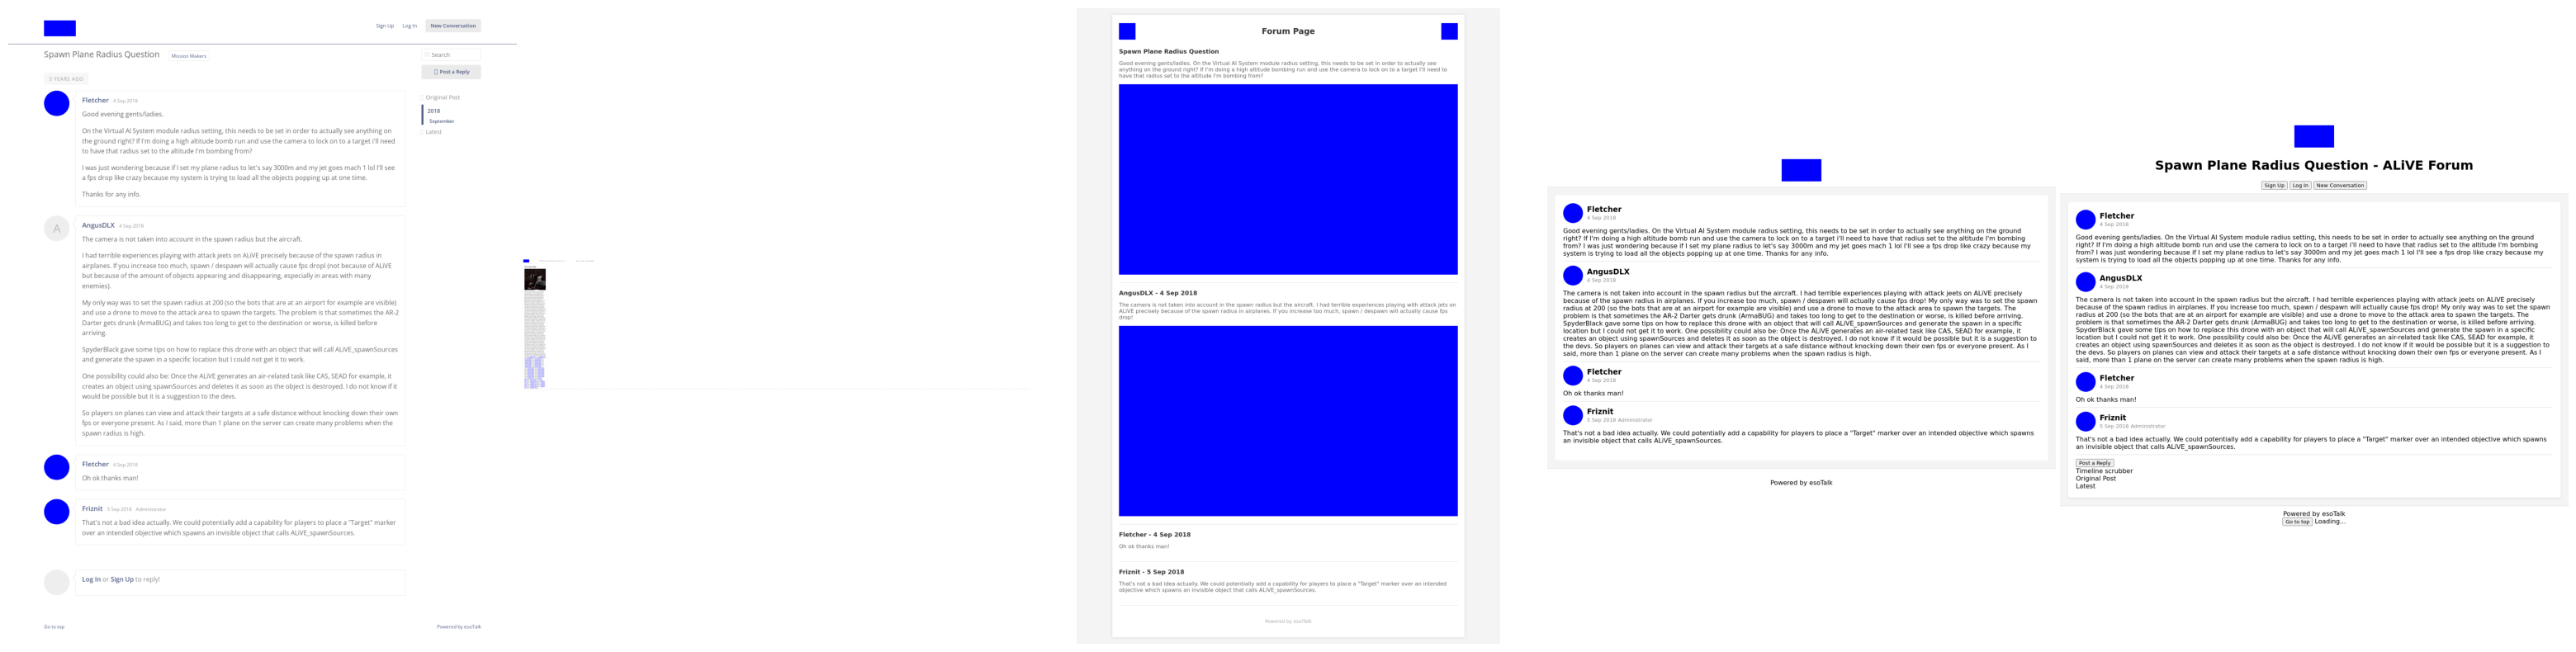

13775.html
websight score:  0.7690933842019883

final_size_score 0.9387075016102325
Matched Text Score 0.9495613812257763
Position Score 0.9494652429647185
Text Color Score 0.9460274357571913
CLIP Score 0.9662407636642456
--------------------------------

direct prompting score:  0.6706255134962332

final_size_score 0.9983033974116294
Matched Text Score 1.0
Position Score 0.8187635044270655
Text Color Score 0.8018537089926723
CLIP Score 0.9473292231559753
--------------------------------

text augmented prompting score:  0.6152845706324067

final_size_score 0.9826144833424247
Matched Text Score 1.0
Position Score 0.8339561133149757
Text Color Score 0.8094318506723993
CLIP Score 0.9191153645515442
--------------------------------

revision prompting score:  0.5018463837405174

final_size_score 0.7264784673744545
Matched Text Score 1.0
Position Score 0.8488662764505961
Text Color Score 0.8099061073926733
CLIP Score 0.9601081013679504
--------------------------------



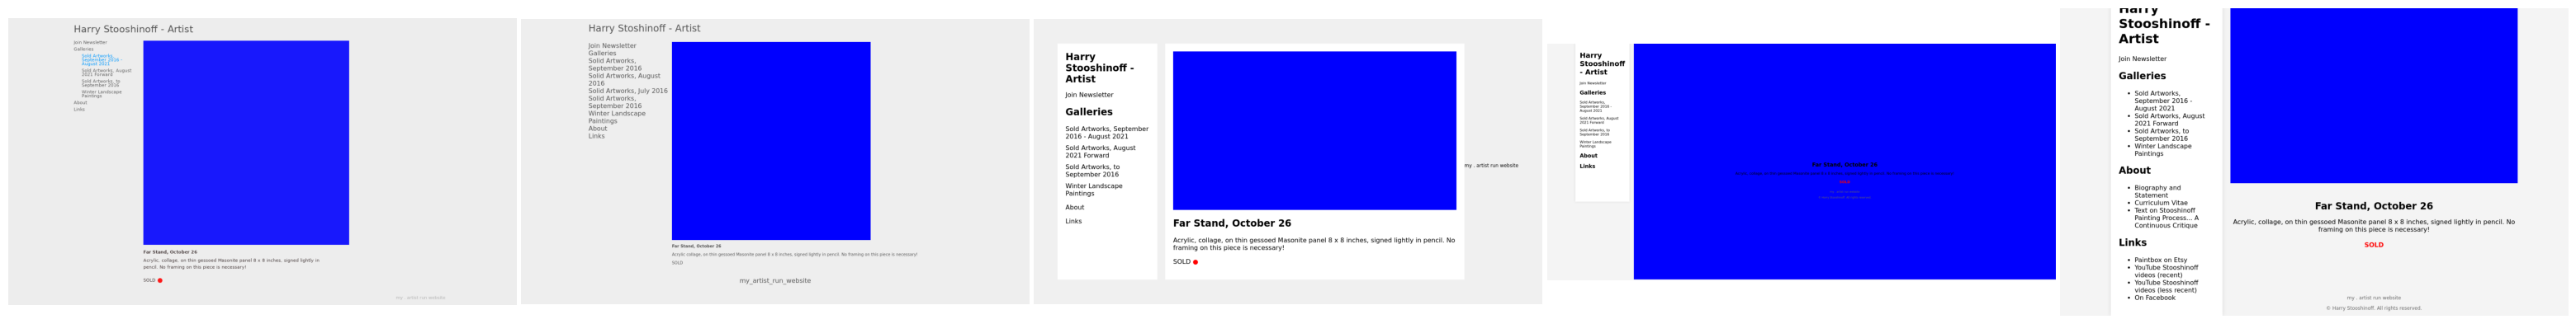

In [5]:
def print_multi_score(multi_score):
    final_size_score, final_matched_text_score, final_position_score, final_text_color_score, final_clip_score = multi_score
    print()
    print("final_size_score", final_size_score)
    print("Matched Text Score", final_matched_text_score)
    print("Position Score", final_position_score)
    print("Text Color Score", final_text_color_score)
    print("CLIP Score", final_clip_score)
    print("--------------------------------\n")

for filename in ["16635.html", "8512.html", "13775.html"]:
    print(filename)

    ## websight score 
    matched, final_score, multi_score = visual_eval_v3(os.path.join(websight_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("websight score: ", final_score)
    print_multi_score(multi_score)
    
    ## direct prompting score 
    matched, final_score, multi_score = visual_eval_v3(os.path.join(direct_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("direct prompting score: ", final_score)
    print_multi_score(multi_score)

    ## text augmented prompting score
    macthed, final_score, multi_score = visual_eval_v3(os.path.join(text_augmented_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("text augmented prompting score: ", final_score)
    print_multi_score(multi_score)

    ## revision prompting score
    macthed, final_score, multi_score = visual_eval_v3(os.path.join(revision_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")))
    print ("revision prompting score: ", final_score)
    print_multi_score(multi_score)

    show_images_side_by_side((os.path.join(reference_dir, filename.replace(".html", ".png")), os.path.join(websight_predictions_dir, filename.replace(".html", ".png")), os.path.join(direct_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(text_augmented_prompting_predictions_dir, filename.replace(".html", ".png")), os.path.join(revision_prompting_predictions_dir, filename.replace(".html", ".png"))), border_color='white', border_width=0.01)

In [16]:
from difflib import SequenceMatcher

text_similarity = SequenceMatcher(None, "The camera is not taken into account in the spawn radius but the aircraft. I had terrible experiences playing with attack jeets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps drop! My only way was to set the spawn radius at 200 (so the bots that are at an airport for example are visible) and use a drone to move to the attack area to spawn the targets. The problem is that sometimes the AR-2 Darter gets drunk (ArmaBUG) and takes too long to get to the destination or worse, is killed before arriving. SpyderBlack gave some tips on how to replace this drone with an object that will call ALiVE_spawnSources and generate the spawn in a specific location but I could not get it to work. One possibility could also be: Once the ALiVE generates an air-related task like CAS, SEAD for example, it creates an object using spawnSources and deletes it as soon as the object is destroyed. I do not know if it would be possible but it is a suggestion to the devs. So players on planes can view and attack their targets at a safe distance without knocking down their own fps or everyone present. As I said, more than 1 plane on the server can create many problems when the spawn radius is high.", \
                                  "My only way was to set the spawn radius at 200 (so the bots that are at an airport for example are visible) and use a drone to move to the attack area to spawn the targets. The problem is that sometimes the AR-2 Darter gets drunk (ArmaBUG) and takes too long to get to the destination or worse, is killed before arriving. SpyderBlack gave some tips on how to replace this drone with an object that will call ALiVE_spawnSources and generate the spawn in a specific location but I could not get it to work. One possibility could also be: Once the ALiVE generates an air-related task like CAS, SEAD for example, it creates an object using spawnSources and deletes it as soon as the object is destroyed. I do not know if it would be possible but it is a suggestion to the devs. So players on planes can view and attack their targets at a safe distance without knocking down their own fps or everyone present. As I said, more than 1 plane on the server can create many problems when the spawn radius is high.").ratio()
print(text_similarity)

0.8848698720776357


In [13]:
from difflib import SequenceMatcher

text_similarity = SequenceMatcher(None, "The camera is not taken into account in the spawn radius but the aircraft. I had terrible experiences playing with attack jets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps drop!", \
                                  "I had terrible experiences playing with attack jeets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps dropl (not because of ALiVE but because of the amount of objects appearing and disappearing, especially in areas with many enemies).").ratio()
print(text_similarity)

0.48336252189141854


In [20]:
from difflib import SequenceMatcher

text_similarity = SequenceMatcher(None, "The camera is not taken into account in the spawn radius but the aircraft. I had terrible experiences playing with attack jets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps drop!", \
                                  "The camera is not taken into account in the spawn radius but the aircraft." + generate_random_string(length=10)).ratio()
print(text_similarity)

0.44314868804664725


In [16]:
import random
import string

def generate_random_string(length=10):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for _ in range(length))

text_similarity = SequenceMatcher(None, generate_random_string(), generate_random_string()).ratio()
print(text_similarity)

0.2


In [27]:
import numpy as np

def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def calculate_similarity_with_levenshtein(a, b, c):
    # Function to calculate normalized similarity
    def normalized_similarity(s1, s2):
        dist = levenshtein_distance(s1, s2)
        # Normalize by the length of the longer string
        return 1 - dist / max(len(s1), len(s2))

    print(len(a))
    print(len(b))
    print(len(c))
    print()

    print(levenshtein_distance(a, c))
    print(levenshtein_distance(b, c))
    print(levenshtein_distance(a + b, c))
    print()

    sim_a_c = normalized_similarity(a, c)
    sim_b_c = normalized_similarity(b, c)
    sim_ab_c = normalized_similarity(a + b, c)

    # Decide if merging a and b is better
    merge_better = sim_ab_c > max(sim_a_c, sim_b_c)

    return sim_a_c, sim_b_c, sim_ab_c, merge_better

# Example usage
a = "The camera is not taken into account in the spawn radius but the aircraft."
b = "I had terrible experiences playing with attack jeets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps dropl (not because of ALiVE but because of the amount of objects appearing and disappearing, especially in areas with many enemies)."
c = "The camera is not taken into account in the spawn radius but the aircraft. I had terrible experiences playing with attack jets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps drop!"
similarities = calculate_similarity_with_levenshtein(a, b, c)
print(similarities)

74
312
259

185
204
130

(0.2857142857142857, 0.34615384615384615, 0.6632124352331606, True)


In [34]:
# Example usage
a = "The camera is not taken into account in the spawn radius but the aircraft."
b = generate_random_string(312)
c = "The camera is not taken into account in the spawn radius but the aircraft. I had terrible experiences playing with attack jets on ALiVE precisely because of the spawn radius in airplanes. If you increase too much, spawn / despawn will actually cause fps drop!"
similarities = calculate_similarity_with_levenshtein(a, b, c)
print(similarities)

74
312
259

185
270
263

(0.2857142857142857, 0.13461538461538458, 0.31865284974093266, True)


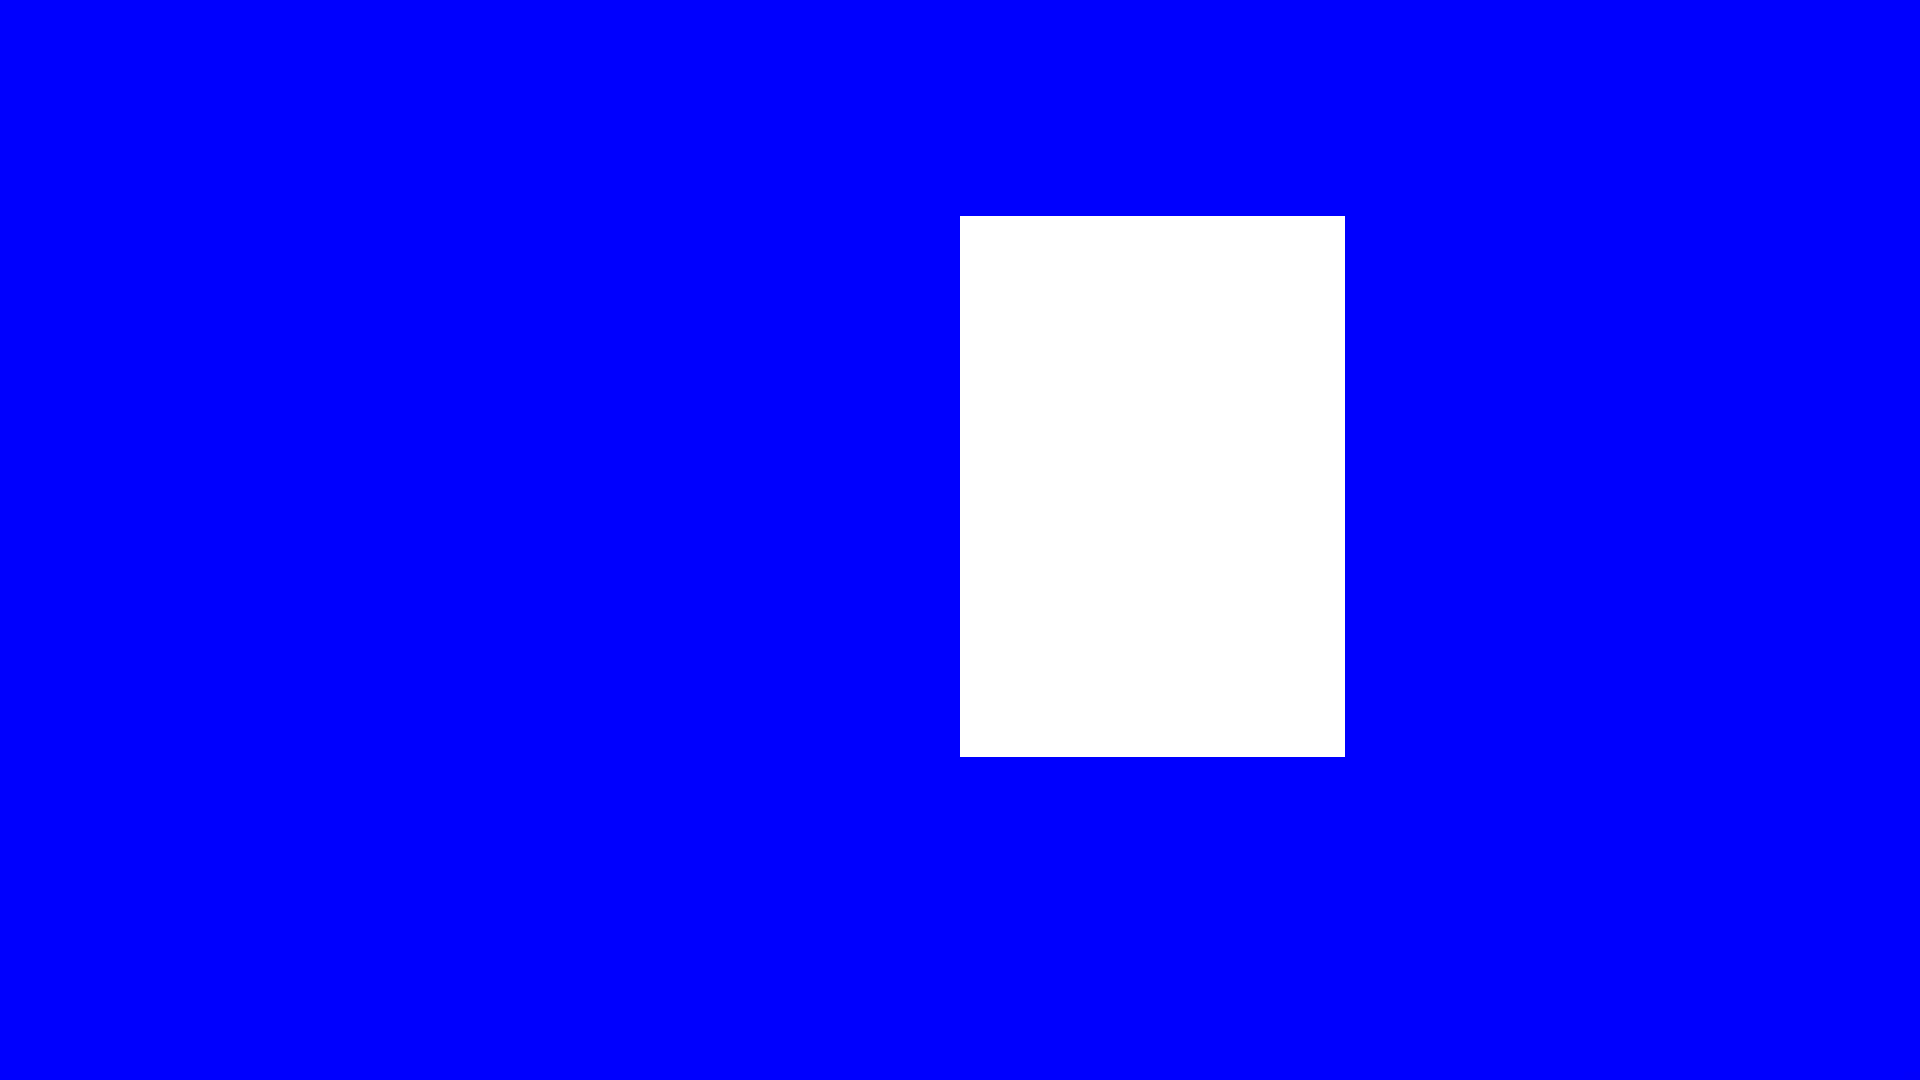

In [35]:
from PIL import Image, ImageDraw

def mask_bounding_boxes(image, bounding_boxes):
    """
    Masks the specified bounding boxes in the image with white color.
    The bounding box coordinates are given as ratios of the image size.

    :param image: A PIL Image object.
    :param bounding_boxes: A list of bounding boxes in the format (x_ratio, y_ratio, h_ratio, w_ratio).
    :return: A PIL Image object with the bounding boxes masked.
    """
    width, height = image.size
    draw = ImageDraw.Draw(image)

    for bbox in bounding_boxes:
        x_ratio, y_ratio, h_ratio, w_ratio = bbox
        x = x_ratio * width
        y = y_ratio * height
        w = w_ratio * width
        h = h_ratio * height
        draw.rectangle([x, y, x + w, y + h], fill="white")

    return image

image = Image.open('/nlp/scr/zyanzhe/Pix2Code/testset_100/rick.jpg')
display(mask_bounding_boxes(image, [[0.5, 0.2, 0.5, 0.2]]))

In [23]:
a = [-0.38095238095238093, -1.0, -0.9440559440559441, -0.6451612903225806, -0.48336252189141854, -0.6451612903225806, -1.0, -0.6666666666666666, -1.0, -0.972972972972973]
b = [-0.38095238095238093, -1.0, -0.9440559440559441, -0.6451612903225806, -0.48336252189141854, -0.6451612903225806, -1.0, -0.6666666666666666, -0.9521531100478469]
difference_of_means(a, b)

0.0